In this kernel, We will make sentiment analysis using the reviews text.

We will begin importing some libraries and then, show some dataset information.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
#Importing dataset
df = pd.read_csv("../input/womens-ecommerce-clothing-reviews/Womens Clothing E-Commerce Reviews.csv", index_col=0)

In [3]:
df.head(10)

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits
7,858,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,1,4,General Petite,Tops,Knits
8,1077,24,Flattering,I love this dress. i usually get an xs but it ...,5,1,0,General,Dresses,Dresses
9,1077,34,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,1,0,General,Dresses,Dresses


In [4]:
pd.DataFrame.info(df)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23486 entries, 0 to 23485
Data columns (total 10 columns):
Clothing ID                23486 non-null int64
Age                        23486 non-null int64
Title                      19676 non-null object
Review Text                22641 non-null object
Rating                     23486 non-null int64
Recommended IND            23486 non-null int64
Positive Feedback Count    23486 non-null int64
Division Name              23472 non-null object
Department Name            23472 non-null object
Class Name                 23472 non-null object
dtypes: int64(5), object(5)
memory usage: 2.0+ MB


The dataset has 10 columns and 23486 rows. Some features has null values.

Now we will extract the features that we will explore.

In [5]:
reviewsDf = df[["Rating","Review Text"]]

The updated dataset:

In [6]:
reviewsDf.head()

,Rating,Review Text
0,4,Absolutely wonderful - silky and sexy and comf...
1,5,Love this dress! it's sooo pretty. i happene...
2,3,I had such high hopes for this dress and reall...
3,5,"I love, love, love this jumpsuit. it's fun, fl..."
4,5,This shirt is very flattering to all due to th...


In [7]:
pd.DataFrame.info(reviewsDf)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23486 entries, 0 to 23485
Data columns (total 2 columns):
Rating         23486 non-null int64
Review Text    22641 non-null object
dtypes: int64(1), object(1)
memory usage: 550.5+ KB


Deleting rows with null values.

In [8]:
reviewsDf = reviewsDf.dropna(subset=['Review Text'])

Resetting index.

In [9]:
reviewsDf.index = pd.Series(list(range(reviewsDf.shape[0])))

In [10]:
reviewsDf.head()

,Rating,Review Text
0,4,Absolutely wonderful - silky and sexy and comf...
1,5,Love this dress! it's sooo pretty. i happene...
2,3,I had such high hopes for this dress and reall...
3,5,"I love, love, love this jumpsuit. it's fun, fl..."
4,5,This shirt is very flattering to all due to th...


Plotting the wordclouds.

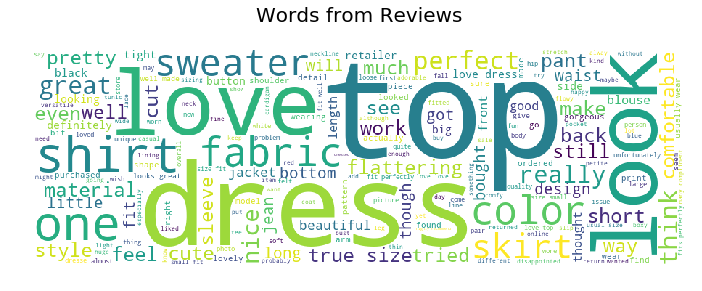

In [11]:
rev = reviewsDf['Review Text']

plt.subplots(figsize=(15,4))
wordcloud = WordCloud(background_color='white', width=900, height=300).generate(" ".join(rev))
plt.imshow(wordcloud)
plt.title('Words from Reviews\n',size=20)
plt.axis('off')
plt.show()

We can see that "top", "love", "dress" and "shirt" is very used on the reviews.

**Preprocessing our data.**

In [12]:
#Removing stop words.
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
!pip install nltk --upgrade
nltk.download('wordnet')

sw = set(stopwords.words('english'))

def preproc(data):
    #converting all to lowercase
    data = data.lower() 
    #Tokenize
    words = RegexpTokenizer(r'[a-z]+').tokenize(data)
    #Deleting stopwords
    words = [w for w in words if not w in sw]
    
    #Lemmatizing
    for pos in [wordnet.NOUN, wordnet.VERB, wordnet.ADJ, wordnet.ADV]:
        words = [WordNetLemmatizer().lemmatize(x, pos) for x in words]
    return " ".join(words)

     |████████████████████████████████| 1.5MB 2.5MB/s 
  Created wheel for nltk: filename=nltk-3.4.5-cp36-none-any.whl size=1449911 sha256=4a7b1ec43c79092e920106e27af461ea9c38675df918fcc71aedb0cdf2841d86
  Stored in directory: /tmp/.cache/pip/wheels/96/86/f6/68ab24c23f207c0077381a5e3904b2815136b879538a24b483
Successfully built nltk
ERROR: allennlp 0.9.0 requires flaky, which is not installed.
ERROR: allennlp 0.9.0 requires responses>=0.7, which is not installed.
ERROR: preprocessing 0.1.13 has requirement nltk==3.2.4, but you'll have nltk 3.4.5 which is incompatible.
ERROR: allennlp 0.9.0 has requirement spacy<2.2,>=2.1.0, but you'll have spacy 2.2.1 which is incompatible.
ERROR: allennlp 0.9.0 has requirement torch>=1.2.0, but you'll have torch 1.1.0 which is incompatible.
  Found existing installation: nltk 3.2.4
    Uninstalling nltk-3.2.4:
      Successfully uninstalled nltk-3.2.4
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is al

In [13]:
reviewsDf['New Text'] = reviewsDf['Review Text'].apply(preproc)

In [14]:
reviewsDf.head()

,Rating,Review Text,New Text
0,4,Absolutely wonderful - silky and sexy and comf...,absolutely wonderful silky sexy comfortable
1,5,Love this dress! it's sooo pretty. i happene...,love dress sooo pretty happen find store glad ...
2,3,I had such high hopes for this dress and reall...,high hope dress really want work initially ord...
3,5,"I love, love, love this jumpsuit. it's fun, fl...",love love love jumpsuit fun flirty fabulous ev...
4,5,This shirt is very flattering to all due to th...,shirt flat due adjustable front tie perfect le...


**Creating the sentiment classifier.
**

We will create a new column that will consider the ratings as follows:

Rating 4 or higher: Positive
rating 3: Neutral
Rating 2 or less: Negative


In [15]:
def polarity (row):
  if row['Rating'] >= 4:
    return 'Positive'
  if row['Rating'] == 3:
    return 'Neutral'
  if row['Rating'] <= 2:
    return 'Negative'

reviewsDf['Class'] = reviewsDf.apply(lambda row: polarity(row), axis=1)

In [16]:
reviewsDf.head()

,Rating,Review Text,New Text,Class
0,4,Absolutely wonderful - silky and sexy and comf...,absolutely wonderful silky sexy comfortable,Positive
1,5,Love this dress! it's sooo pretty. i happene...,love dress sooo pretty happen find store glad ...,Positive
2,3,I had such high hopes for this dress and reall...,high hope dress really want work initially ord...,Neutral
3,5,"I love, love, love this jumpsuit. it's fun, fl...",love love love jumpsuit fun flirty fabulous ev...,Positive
4,5,This shirt is very flattering to all due to th...,shirt flat due adjustable front tie perfect le...,Positive


Creating train and test base.

In [17]:
text, classe = reviewsDf["New Text"], reviewsDf["Class"]

In [18]:
text

0              absolutely wonderful silky sexy comfortable
1        love dress sooo pretty happen find store glad ...
2        high hope dress really want work initially ord...
3        love love love jumpsuit fun flirty fabulous ev...
4        shirt flat due adjustable front tie perfect le...
                               ...                        
22636    happy snag dress great price easy slip flat cu...
22637    remind maternity clothe soft stretchy shiny ma...
22638    fit well top see never would work glad able tr...
22639    buy dress wed summer cute unfortunately fit pe...
22640    dress lovely platinum feminine fit perfectly e...
Name: New Text, Length: 22641, dtype: object

In [19]:
classe

0        Positive
1        Positive
2         Neutral
3        Positive
4        Positive
           ...   
22636    Positive
22637     Neutral
22638     Neutral
22639     Neutral
22640    Positive
Name: Class, Length: 22641, dtype: object

In [20]:
train_text = text[:16980]
test_text = text[16981:22640]
train_classe = classe[:16980]
test_classe = classe[16981:22640]

**Processing TD-IDF Matrix**

In [21]:
#Feature extraction

from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(encoding='latin-1')
X_train_counts = count_vect.fit_transform(train_text)
X_train_counts.shape

(16980, 8819)

In [22]:
count_vect.vocabulary_.get('dress')

2297

In [23]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer(use_idf=True)
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(16980, 8819)

Naive Bayes.

In [24]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tfidf, train_classe)

In [25]:
from sklearn.metrics import accuracy_score
X_test_counts = count_vect.transform(test_text)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)
predito = clf.predict(X_test_tfidf)
gaussian_acc = accuracy_score(test_classe, predito)
print(gaussian_acc)

0.7752253048241738


Random Forest.

In [26]:
from sklearn.ensemble import RandomForestClassifier

ran = RandomForestClassifier(n_estimators=50)
ran.fit(X_train_tfidf, train_classe)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [27]:
#Accuracy score
X_test_counts = count_vect.transform(test_text)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)
predito = ran.predict(X_test_tfidf)
ran_acc = accuracy_score(test_classe, predito)
print(ran_acc)

0.7865347234493727


Support Vector Machine

In [28]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train_tfidf, train_classe)

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [29]:
#Accuracy score

X_test_counts = count_vect.transform(test_text)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)
predito = svm.predict(X_test_tfidf)
svm_acc = accuracy_score(test_classe, predito)
print(svm_acc)

0.7734582081639866


Neural network.

In [30]:
from sklearn.neural_network import MLPClassifier

nn = MLPClassifier()
nn.fit(X_train_tfidf, train_classe)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [31]:
#Accuracy score

X_test_counts = count_vect.transform(test_text)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)
predito = nn.predict(X_test_tfidf)
nn_acc = accuracy_score(test_classe, predito)
print(nn_acc)

0.7815868528008482


Logistic Regression.

In [32]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train_tfidf, train_classe)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
#Accuracy score

X_test_counts = count_vect.transform(test_text)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)
predito = lr.predict(X_test_tfidf)
lr_acc = accuracy_score(test_classe, predito)
print(lr_acc)

0.813924721682276


The ranking bellow show us that Logistic Regression was the most accurate model and Support Vector Machines was the worse.

In [34]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Neural Network'],
    'Score': [svm_acc, lr_acc, 
              ran_acc, gaussian_acc, nn_acc]})
models.sort_values(by='Score', ascending=False)

,Model,Score
1,Logistic Regression,0.813925
2,Random Forest,0.786535
4,Neural Network,0.781587
3,Naive Bayes,0.775225
0,Support Vector Machines,0.773458
